In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import ascii
from astropy.timeseries import LombScargle

import scipy
from scipy.fft import fftfreq
from scipy.fft import fft

import allesfitter

# 1) Obtaining Residuals

Here, residuals are taken out and saved in a csv file

In [2]:
#::: your settings
datadir = 'allesfit' #change this to what you need
inst = 'TIC_1403938' #change this to what you need
key = 'flux' #change this to what you need


#::: initialize the allesclass
alles = allesfitter.allesclass(datadir);


#::: load the data (and the correct error bars)
time = alles.data[inst]['time']
flux = alles.data[inst][key]
flux_err = alles.data[inst]['err_scales_'+key] * alles.posterior_params_median['err_'+key+'_'+inst]


#::: load the median baseline, median lightcurve model, and median residuals
baseline = alles.get_posterior_median_baseline(inst, key)
model = alles.get_posterior_median_model(inst, key)
residuals = alles.get_posterior_median_residuals(inst, key)


#::: save everything to a file for your collaborators
X = np.column_stack((time, flux, flux_err,residuals)) #detrended_flux, model, residuals))
np.savetxt('residual_TIC_1403938.csv', X, delimiter=',')

Filling the Basement

OrderedDict([('user-given:', ''),
             ('companions_phot', ['b']),
             ('companions_rv', []),
             ('inst_phot', ['TIC_1403938']),
             ('inst_rv', []),
             ('multiprocess', True),
             ('multiprocess_cores', 'all'),
             ('fast_fit', 'False'),
             ('do_not_phase_fold', 'True'),
             ('shift_epoch', False),
             ('mcmc_nwalkers', '100'),
             ('mcmc_total_steps', '3000'),
             ('mcmc_burn_steps', '2000'),
             ('mcmc_thin_by', '10'),
             ('ns_modus', 'dynamic'),
             ('ns_nlive', '500'),
             ('ns_bound', 'single'),
             ('ns_sample', 'rwalk'),
             ('ns_tol', '0.01'),
             ('baseline_flux_TIC_1403938', 'hybrid_spline'),
             ('error_flux_TIC_1403938', 'sample'),
             ('N_flares', '2'),
             ('automatically set:', ''),
             ('time_format', 'BJD_TDB'),
             ('inst_rv2', []


! WARNING:
 You are using outdated keywords. Automatically renaming log_err_flux_TIC_1403938 ---> ln_err_flux_TIC_1403938. Please fix this before the Duolingo owl comes to get you.
type: <class 'UserWarning'>, file: /home/prachi/anaconda3/envs/Flare/lib/python3.9/site-packages/allesfitter/basement.py, line: 632


# 3) Opening residual file

Here, the residual file is opened and labelled

In [6]:
colnames = ("time" , "flux" , "flux_err" , "residuals")
file = ascii.read("residual_TIC_1403938.csv", Reader=ascii.NoHeader, names=colnames)
print(file)

       time           flux          flux_err              residuals       
------------------ ---------- -------------------- -----------------------
1518.7504701241069 0.97606468 0.033343016127210995   -0.004294110716917581
 1518.751859046871 0.96651626 0.033327472157140874   -0.012805342243609585
1518.7532479691702  0.9779278 0.033365117341104325  -0.0004079812862060328
1518.7546368914702 0.98774427  0.03338936499092538    0.010343708410177666
 1518.756025814235 0.95797396  0.03332796748850882    -0.01854121696873198
1518.7574147365342 0.96608758  0.03328840125749405   -0.009591282117396242
1518.7588036588334 0.98375267 0.033378910616180875     0.00886181916771572
               ...        ...                  ...                     ...
1518.9407524767714  1.0443672  0.03355230804457055   -0.006206635844259827
1518.9421413986058   1.042783  0.03351558800332077   -0.005227641862775045
 1518.943530320906  1.0399464  0.03354021829007157  -0.0055584146603362364
1518.9449192427385  1.042

# Plots

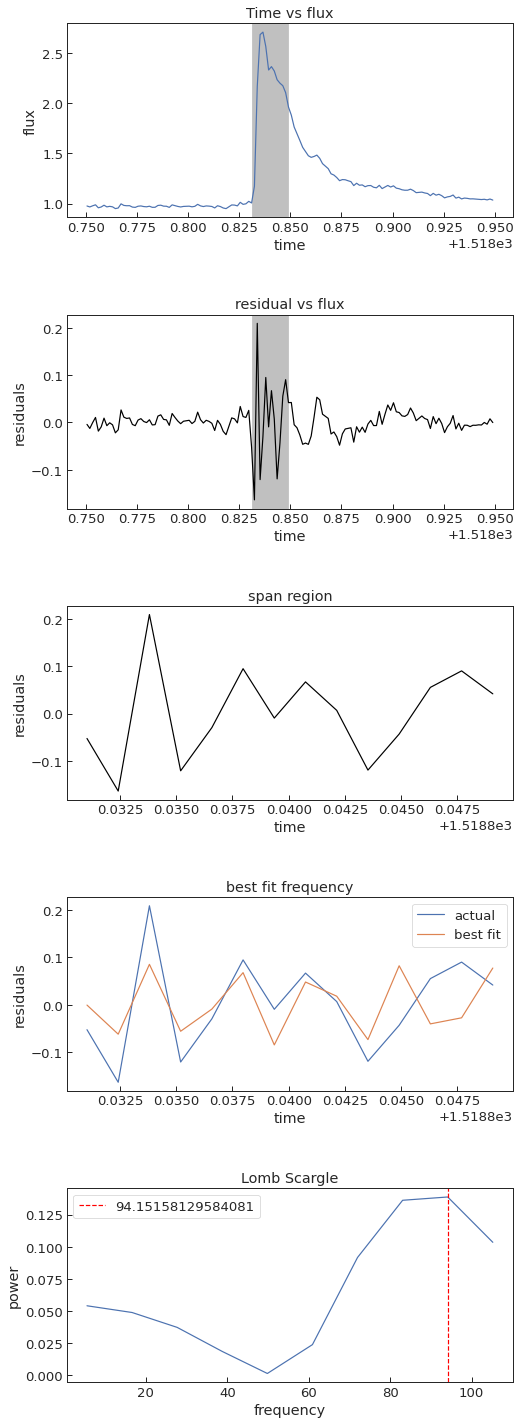

In [54]:
time = file["time"]
flux = file["flux"]
residuals = file ["residuals"]

t_start = 1518.8310276235154
t_end = 1518.849083613405355


#plots side by side
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize = (8,25))

#time vs flux

ax1.title.set_text("Time vs flux")
ax1.plot(time, flux, 'b-')
ax1.axvspan(t_start,t_end, color = 'silver')
ax1.set_xlabel("time")
ax1.set_ylabel("flux")

#plot of time vs residuals with span
ax2.axvspan(t_start,t_end, color = 'silver')
ind = np.where((time >= t_start) & (time <= t_end))
ax2.title.set_text("residual vs flux")
ax2.plot(time, residuals, 'black')
ax2.set_xlabel("time")
ax2.set_ylabel("residuals")

#plot of span region
time_2 = time[ind]
residuals_2 = residuals[ind]
ax3.title.set_text("span region")
ax3.plot(time_2,residuals_2, 'black')
ax3.set_xlabel("time")
ax3.set_ylabel("residuals")

#Best frequency
frequency, power = LombScargle(time_2, residuals_2).autopower(minimum_frequency=1,maximum_frequency=400)
best_frequency = frequency[np.argmax(power)]
t_fit = time_2
ls = LombScargle(time_2, residuals_2)
y_fit = ls.model(t_fit, best_frequency)
ax4.plot(time_2,residuals_2, label = "actual")
ax4.plot(t_fit, y_fit, label = "best fit")
ax4.title.set_text("best fit frequency")
ax4.set_xlabel("time")
ax4.set_ylabel("residuals")
ax4.legend()

#lomb scargle applied
frequency, power = LombScargle(time_2, residuals_2).autopower(maximum_frequency=100)
ax5.plot(frequency,np.abs(power))
ax5.title.set_text("Lomb Scargle")
ax5.set_xlabel("frequency")
ax5.set_ylabel("power")

# marking lines on lomb scargle plot
max_power = max(power)  # Find the maximum y value
max_freq = frequency[power.argmax()] #Find the x value corresponding to the max y value
plt.axvline(x=max_freq, color = "red", linestyle = "--", label = max_freq)
plt.legend()

plt.subplots_adjust(hspace=0.5)

# Lomb Scargle

In [35]:
#plots side by side
#fig,(ax1,ax2) = plt.subplots(1,2, figsize = (15,5))

#best fit frequency
#frequency, power = LombScargle(time_2, residuals_2).autopower(minimum_frequency=1,maximum_frequency=400)
#best_frequency = frequency[np.argmax(power)]
#t_fit = time_2
#ls = LombScargle(time_2, residuals_2)
#y_fit = ls.model(t_fit, best_frequency)
#ax1.plot(time_2,residuals_2, label = "actual")
#ax1.plot(t_fit, y_fit, label = "best fit")
#ax1.title.set_text("best fit frequency")
#ax1.set_xlabel("time")
#ax1.set_ylabel("residuals")
#ax1.legend()

#lomb scargle applied
#frequency, power = LombScargle(time_2, residuals_2).autopower(maximum_frequency=100)
#ax2.plot(frequency,np.abs(power))
#ax2.title.set_text("Lomb Scargle")
#ax2.set_xlabel("frequency")
#ax2.set_ylabel("power")